In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('overall_statistics-frac-check.csv')

In [3]:
df = df.dropna(subset=['profile_location'])

In [4]:
# Use only bucket sediment samples from the underlayer (UL) by removing the samples taken from the overlayer (OL)
df = df[df['samp_method'] != 'OL']

In [5]:
# Count which sampels stem from bucket sediment samples
df[df['samp_method'] == 'UL']

,site,sample name,Profile ID,Profile,mass_kg,bed_elevation_dhhn,profile_location,river_km,samp_method,date,...,4,2,1,0.5,0.25,0.125,0.063,0.031,0.0039,6.00E-05
12,KN,SP-474.1-S-I-US,474.1-S,E,9680.0,130.458,1.0,474.125,UL,13.07.2022,...,63.438633,47.022268,39.098912,31.434490,10.046608,0.776800,0.103573,0.0,0.0,0.0
21,KN,SP-474.2-I-US,474.2,F,15480.0,130.259,1.0,474.200,UL,13.07.2022,...,69.665476,59.532316,50.763235,36.830140,4.839234,0.227347,0.064956,0.0,0.0,0.0
26,KN,SP-474.5-I-US,474.5,G,13420.0,130.012,1.0,474.500,UL,14.07.2022,...,53.394181,47.290359,39.589276,24.301198,6.731318,1.254991,0.342270,0.0,0.0,0.0
28,KN,SP-474.5-II-US,474.5,G,10785.0,129.682,2.0,474.500,UL,14.07.2022,...,45.845005,38.982260,31.886088,21.335201,6.489262,1.447246,0.373483,0.0,0.0,0.0
32,KN,SP-474.6-I-US,474.6,H,14640.0,130.133,1.0,474.600,UL,14.07.2022,...,39.424066,31.916352,24.922866,16.249571,4.902297,1.302708,0.445663,0.0,0.0,0.0


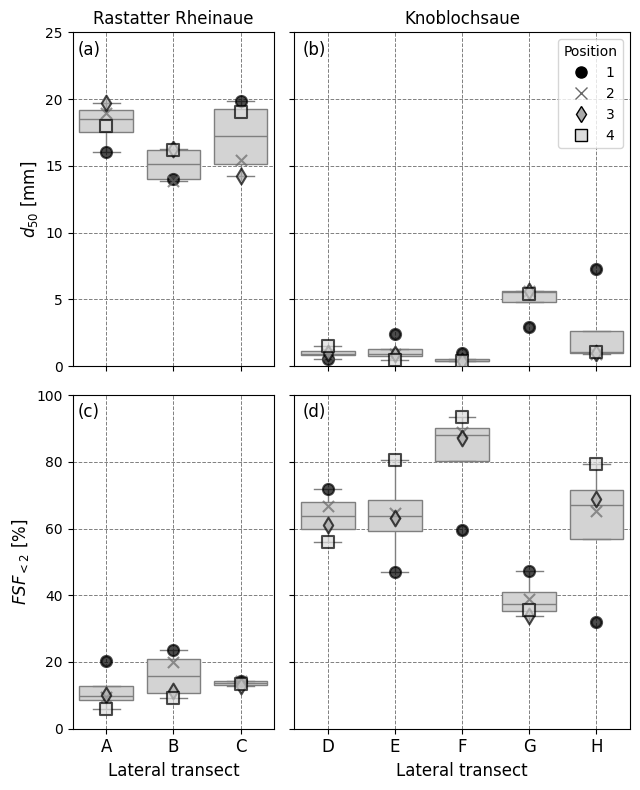

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define colors for each profile_location (1, 2, 3, 4)
colors = {1: 'black', 2: 'dimgrey', 3: 'darkgrey', 4: 'gainsboro'}

# Define markers for each profile_location (1, 2, 3, 4)
markers = {1: 'o', 2: 'x', 3: 'd', 4: 's'}

# Filter the data by site
df_PT = df[df['site'] == 'PT'].sort_values('river_km', ascending=False)
df_KN = df[df['site'] == 'KN'].sort_values('river_km', ascending=False)

# Create the figure and subplots with width ratios (PT will be 3/5 of the width of KN)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(6.5, 8), gridspec_kw={'width_ratios': [3, 5]}, sharey='row', sharex='col')

# Plot the first row: d50 variable for site PT
for profile, color in colors.items():
    sns.stripplot(y="d50",
                  x="river_km",
                  alpha=0.7,
                  size=8,
                  marker=markers[profile],  # Use specific marker for profile_location
                  color=color,  # Use specific color for profile_location
                  edgecolor='black',
                  linewidth=1.5,
                  data=df_PT[df_PT['profile_location'] == profile],
                  ax=ax1)
sns.boxplot(data=df_PT, y='d50', x='river_km', showmeans=False, ax=ax1,
            color='lightgray')
ax1.set_xlabel('')
ax1.set_ylabel('$d_{50}$ [mm]', fontsize=12)
ax1.set_title('Rastatter Rheinaue', fontsize=12)

# Custom x-tick labels for PT
custom_xticks_PT = ["A", "B", "C"]
ax1.set_xticks(range(len(custom_xticks_PT)))
ax1.set_xticklabels(custom_xticks_PT, fontsize=12)

# Add subplot label (a) to ax1
ax1.text(0.025, 0.975, '(a)', transform=ax1.transAxes, fontsize=12, va='top', ha='left')

# Plot the first row: d50 variable for site KN
for profile, color in colors.items():
    sns.stripplot(y="d50",
                  x="river_km",
                  alpha=0.7,
                  size=8,
                  marker=markers[profile],  # Use specific marker for profile_location
                  color=color,  # Use specific color for profile_location
                  edgecolor='black',
                  linewidth=1.5,
                  data=df_KN[df_KN['profile_location'] == profile],
                  ax=ax2)
sns.boxplot(data=df_KN, y='d50', x='river_km', showmeans=False, ax=ax2,
            color='lightgray')
ax2.set_xlabel('')
ax2.set_title('Knoblochsaue', fontsize=12)

# Remove the y-axis label from the KN plot
ax2.set_ylabel('')

# Custom x-tick labels for KN
custom_xticks_KN = ["D", "E", "F", "G", "H"]
ax2.set_xticks(range(len(custom_xticks_KN)))
ax2.set_xticklabels(custom_xticks_KN, fontsize=12)

# Add subplot label (b) to ax2
ax2.text(0.025, 0.975, '(b)', transform=ax2.transAxes, fontsize=12, va='top', ha='left')

# Plot the second row: "2" variable for site PT
for profile, color in colors.items():
    sns.stripplot(y="2",
                  x="river_km",
                  alpha=0.7,
                  size=8,
                  marker=markers[profile],  # Use specific marker for profile_location
                  color=color,  # Use specific color for profile_location
                  edgecolor='black',
                  linewidth=1.5,
                  data=df_PT[df_PT['profile_location'] == profile],
                  ax=ax3)
sns.boxplot(data=df_PT, y='2', x='river_km', showmeans=False, ax=ax3,
            color='lightgray')
ax3.set_xlabel('Lateral transect', fontsize=12)
ax3.set_ylabel('$FSF_{<2}$ [%]', fontsize=12)

# Custom x-tick labels for PT
ax3.set_xticks(range(len(custom_xticks_PT)))
ax3.set_xticklabels(custom_xticks_PT, fontsize=12)

# Add subplot label (c) to ax3
ax3.text(0.025, 0.975, '(c)', transform=ax3.transAxes, fontsize=12, va='top', ha='left')

# Plot the second row: "2" variable for site KN
for profile, color in colors.items():
    sns.stripplot(y="2",
                  x="river_km",
                  alpha=0.7,
                  size=8,
                  marker=markers[profile],  # Use specific marker for profile_location
                  color=color,  # Use specific color for profile_location
                  edgecolor='black',
                  linewidth=1.5,
                  data=df_KN[df_KN['profile_location'] == profile],
                  ax=ax4)
sns.boxplot(data=df_KN, y='2', x='river_km', showmeans=False, ax=ax4,
            color='lightgray')
ax4.set_xlabel('Lateral transect', fontsize=12)

# Remove the y-axis label from the KN plot
ax4.set_ylabel('')

# Custom x-tick labels for KN
ax4.set_xticks(range(len(custom_xticks_KN)))
ax4.set_xticklabels(custom_xticks_KN, fontsize=12)

# Add subplot label (d) to ax4
ax4.text(0.025, 0.975, '(d)', transform=ax4.transAxes, fontsize=12, va='top', ha='left')

# Add grid to all plots
ax1.grid(True, color='gray', linestyle='--', linewidth=0.7)
ax2.grid(True, color='gray', linestyle='--', linewidth=0.7)
ax3.grid(True, color='gray', linestyle='--', linewidth=0.7)
ax4.grid(True, color='gray', linestyle='--', linewidth=0.7)

# Adjust y-limits as needed
ax1.set_ylim(bottom=0, top=25)  # Adjust according to your d50 data range
ax3.set_ylim(bottom=0, top=100)  # Adjust according to your "2" data range

# Create a custom legend for profile_location
legend_elements = [Line2D([0], [0], marker=markers[1], color=colors[1], label='1', markeredgecolor='black', 
                          markerfacecolor=colors[1], markersize=8, linestyle='None'),
                   Line2D([0], [0], marker=markers[2], color=colors[2], label='2',
                          markerfacecolor=colors[2], markersize=8, linestyle='None'),
                   Line2D([0], [0], marker=markers[3], color=colors[3], label='3', markeredgecolor='black', 
                          markerfacecolor=colors[3], markersize=8, linestyle='None'),
                   Line2D([0], [0], marker=markers[4], color=colors[4], label='4', markeredgecolor='black',
                          markerfacecolor=colors[4], markersize=8, linestyle='None')]

# Add the legend to ax1
ax2.legend(handles=legend_elements, loc='upper right', title="Position")

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
plt.savefig('sed-data.jpg', dpi=600)

# Show the plot (optional)
plt.show()


In [7]:
df_PT[df_PT['Profile ID'] == 'C']['2'].mean()

13.6554022575

In [14]:
df_KN[df_KN['Profile'] == 'G']['2'].mean()

38.9476204475

In [21]:
df_KN[df_KN['Profile ID'] == '474.5']['d50']

30    5.408696
29    5.614089
28    5.618182
26    2.887850
Name: d50, dtype: float64

In [17]:
df_PT['2'].mean()

13.740980995333333